In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import matplotlib.pyplot as plt



# Parameters selection

In [25]:

batch_size = 5
img_size = 120
num_epochs = 50
dataset_split = 1800


# Loading dataset

In [28]:

data = "C:/Users/srisa/Downloads/archive/data/test_color"
x = []
y = []

# Load images and preprocess them
for image_file in os.listdir(data)[0:dataset_split]:
    rgb_image = Image.open(os.path.join(data, image_file)).resize((img_size, img_size))
    #Normalize RGB image
    rgb_image_array = np.asarray(rgb_image) / 255.0  
    grey_image = rgb_image.convert('L')
    # Normalize grayscale image
    grey_image_array = np.asarray(grey_image).reshape((img_size, img_size, 1)) / 255.0  
    x.append(grey_image_array)
    y.append(rgb_image_array)



# Handling dataset 

In [30]:

x = np.array(x)
y = np.array(y)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1)

# Construct tf.data.Dataset object
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).batch(batch_size)




# Build Convolutional Autoencoder with Resizing

In [38]:
def build_autoencoder(input_shape=(img_size, img_size, 1)):
#Encoder
    
    inputs = layers.Input(shape=input_shape)

    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = layers.MaxPooling2D((2, 2), padding='same')(conv1)  # 60x60

    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = layers.MaxPooling2D((2, 2), padding='same')(conv2)  # 30x30

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    pool3 = layers.MaxPooling2D((2, 2), padding='same')(conv3)  # 15x15

    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    pool4 = layers.MaxPooling2D((2, 2), padding='same')(conv4)  # 8x8

#Bottleneck
    bottleneck = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)

#Decoder
    decode1 = layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', activation='relu')(bottleneck)  
    decode2 = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu')(decode1) 
    decode3 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(decode2)  
    decode4 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(decode3)  

#Resize the output image back to 120x120 pixels if it the size exceeds 
    output = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decode4)
#Ensuring the output image 120x120 pixels 
    output = layers.Resizing(img_size, img_size)(output) 

#Building model
    model = models.Model(inputs, output)
    return model
    
# Instantiate and compile the model
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = autoencoder.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

# Save the model
autoencoder.save('autoencoder_colorization_model.h5')

# Model Summary
autoencoder.summary()




Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 61s 415ms/step - loss: 0.0608 - val_loss: 0.0265
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 58s 436ms/step - loss: 0.0260 - val_loss: 0.0220
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 61s 461ms/step - loss: 0.0227 - val_loss: 0.0203
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 60s 451ms/step - loss: 0.0210 - val_loss: 0.0194
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 61s 455ms/step - loss: 0.0201 - val_loss: 0.0188
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 62s 464ms/step - loss: 0.0193 - val_loss: 0.0185
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 59s 446ms/step - loss: 0.0188 - val_loss: 0.0184
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 59s 442ms/step - loss: 0.0184 - val_loss: 0.0187
Epoch 9/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 68s 509ms/step - loss: 0.0184 - val_loss: 0.0186
Epoch 10/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 78s 589ms/step - loss: 0.0180 - val_loss: 0.0190
Epoch 11/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 69s 515ms/step - loss: 0.0177 - val_loss: 0.0184
Epoch 12/50
133/133

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 120, 120, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 120, 120, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_16             │ (None, 16, 16, 512)    │     4,719,104 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_17             │ (None, 32, 32, 256)    │     1,179,904 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_18             │ (None, 64, 64, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_19             │ (None, 128, 128, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 128, 128, 3)    │         1,731 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_3 (Resizing)           │ (None, 120, 120, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,617,035 (143.50 MB)

 Trainable params: 12,539,011 (47.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,078,024 (95.67 MB)

# Visualize the results

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step


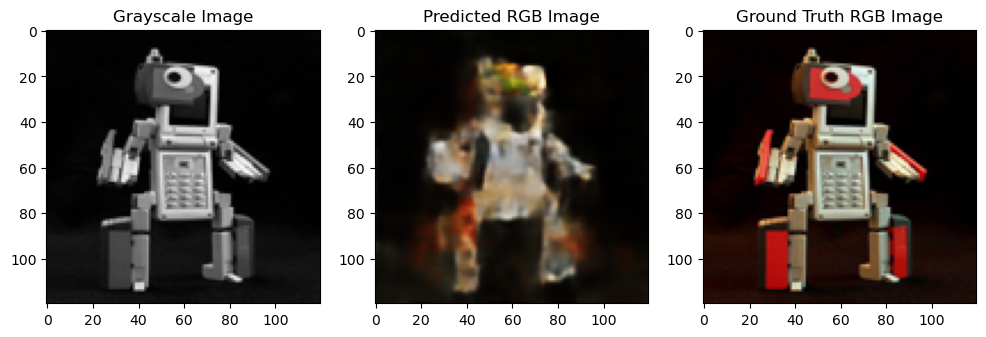

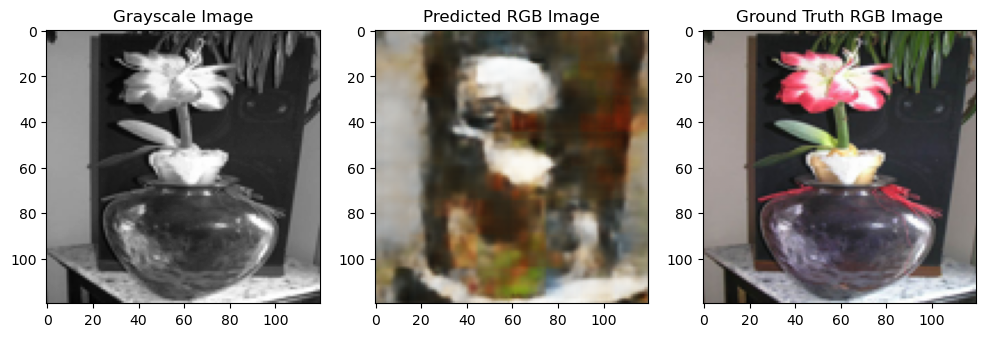

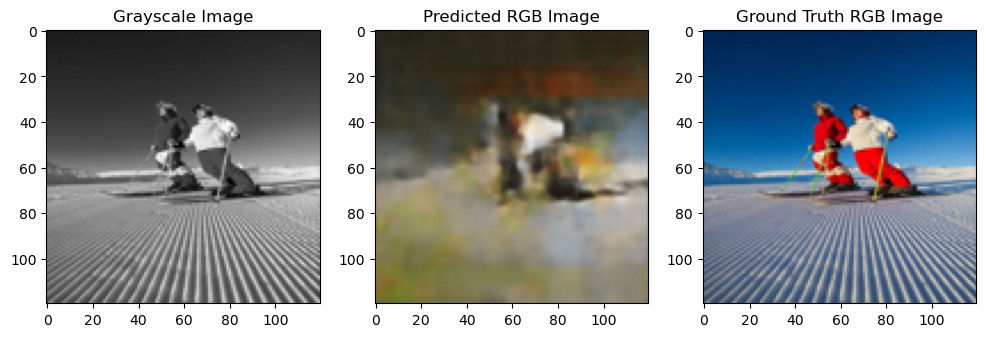

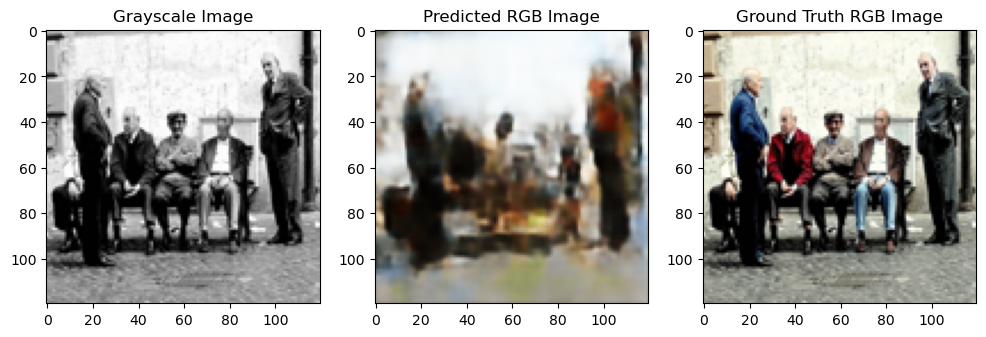

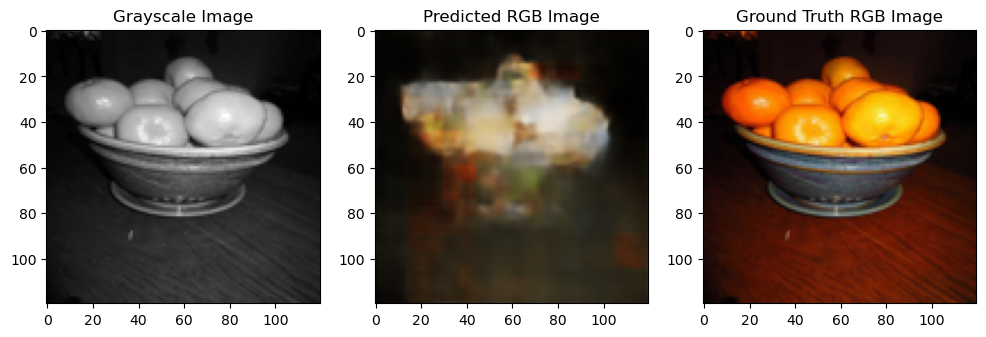

In [44]:

def visual_predictions(model, test_x, test_y):
    predictions = model.predict(test_x)
    num_images = 5

    for i in range(num_images):
        plt.figure(figsize=(12, 4))

        # Grayscale Input Image
        plt.subplot(1, 3, 1)
        plt.imshow(test_x[i].reshape(img_size, img_size), cmap='gray')
        plt.title("Grayscale Image")

        # Model's Prediction
        plt.subplot(1, 3, 2)
        plt.imshow(predictions[i])
        plt.title("Predicted RGB Image")

        # Ground Truth Image
        plt.subplot(1, 3, 3)
        plt.imshow(test_y[i])
        plt.title("Ground Truth RGB Image")

        plt.show()


# Test the model and visualize predictions
visual_predictions(autoencoder, test_x, test_y)